# Efficient frontier

In [1]:
import pandas as pd
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

In [2]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [3]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [4]:
ind.columns=ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [5]:
ind.shape

(1110, 30)

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import modules_1 as kit
ind=kit.get_ind_returns()
ind.shape

(1110, 30)

In [8]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


<AxesSubplot:>

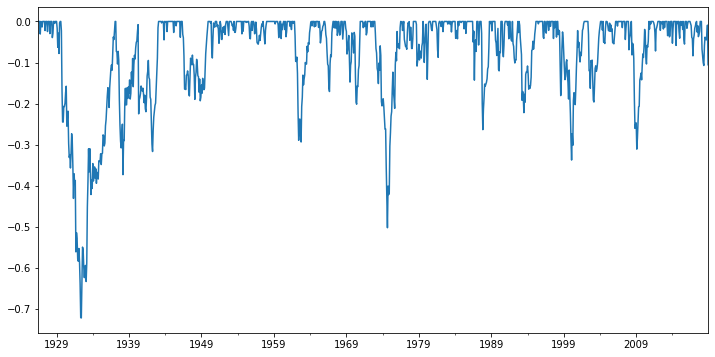

In [11]:
kit.drawdown(ind['Food'])['Drawdown'].plot.line(figsize=(12,6))

In [13]:
kit.var_gaussian(ind[['Food','Smoke','Coal','Beer','Fin']],modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

In [14]:
kit.var_gaussian(ind,modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [15]:
kit.var_gaussian(ind,modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

<AxesSubplot:>

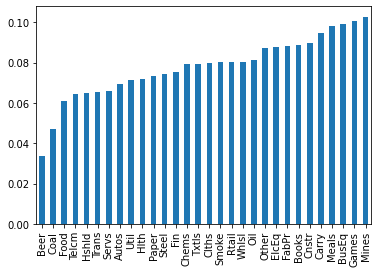

In [16]:
kit.var_gaussian(ind,modified=True).sort_values().plot.bar()

<AxesSubplot:title={'center':'Industry Sharpe Ratios 1926-2018'}>

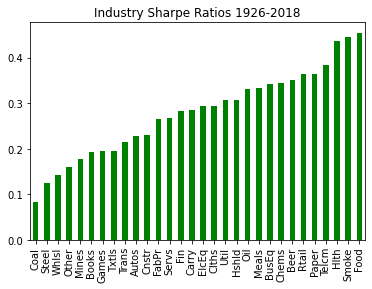

In [18]:
kit.sharpe_ratio(ind,0.03,12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926-2018",color='green')

<AxesSubplot:title={'center':'Industry Sharpe Ratios 2000-2018'}>

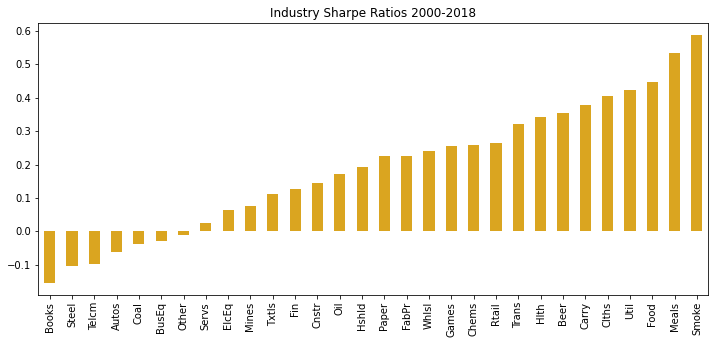

In [20]:
kit.sharpe_ratio(ind['2000':],0.03,12).sort_values().plot.bar(title="Industry Sharpe Ratios 2000-2018",figsize=(12,5),color='goldenrod')

<AxesSubplot:>

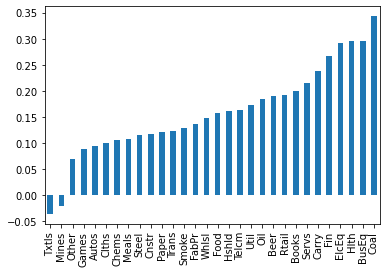

In [23]:
er=kit.annualize_rets(ind['1995':'2000'],12)
er.sort_values().plot.bar()

In [24]:
cov = ind["1995":"2000"].cov()
cov.shape

(30, 30)

# Efficient Frontier Part II


In [30]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import modules_1 as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
l=["Food","Beer","Smoke","Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [32]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [33]:
import numpy as np
weights=np.repeat(1/4,4)
erk.portfolio_return(weights,er[l])

0.19511097196038385

In [34]:
erk.portfolio_vol(weights,cov.loc[l,l])

0.055059195776437045

## 2 Asset Frontier

In [35]:
l=["Games","Fin"]

In [38]:
n_points=20
weights= [np.array([w,1-w]) for w in np.linspace(0,1,n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [39]:
len(weights)

20

<AxesSubplot:xlabel='Vol', ylabel='R'>

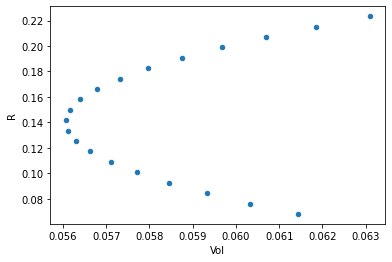

In [45]:
import pandas as pd
rets= [erk.portfolio_return(w,er[l]) for w in weights]
vols= [erk.portfolio_vol(w,cov.loc[l,l]) for w in weights]
ef=pd.DataFrame({"R":rets,"Vol":vols})
ef.plot.scatter(x="Vol",y="R")

<AxesSubplot:xlabel='Volatility'>

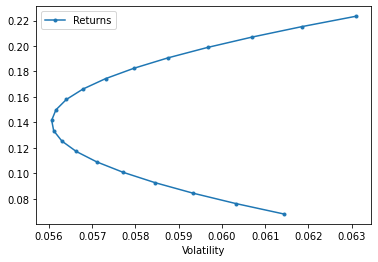

In [46]:
erk.plot_ef2(20,er[l],cov.loc[l,l])

<AxesSubplot:xlabel='Volatility'>

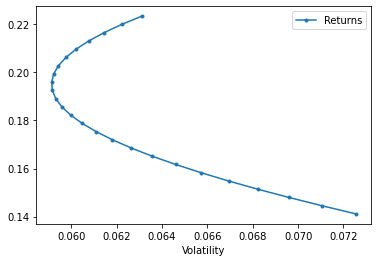

In [47]:
l=["Fin","Beer"]
erk.plot_ef2(25,er[l],cov.loc[l,l])

# N-Efficient Frontier

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import modules_1 as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
er.head()

Food     0.116799
Beer     0.141126
Smoke    0.107830
Games    0.068212
Books    0.187286
dtype: float64

In [6]:
l=['Games','Fin']
w15=erk.minimize_vol(0.15,er[l],cov.loc[l,l])
w15

array([0.47287631, 0.52712369])

<AxesSubplot:xlabel='Volatility'>

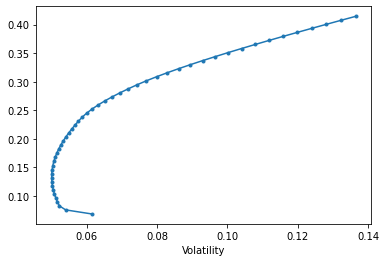

In [9]:
l=['Smoke','Fin','Games','Coal']
erk.plot_ef(50,er[l],cov.loc[l,l])